Importing packages to be used:

In [91]:
# Import necessary libraries
import numpy as np
import pandas as pd
from openpyxl import load_workbook
from datetime import date
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import os # to work with local directory
import re
import plotly.express as px
import scipy.stats
from scipy.interpolate import interp1d
from itertools import islice
import seaborn as sb


<H1> Collection Of data </H1>

<h3> Importing Data </h3>

<h5> Deriving data from local files </h5>


In [92]:
def toDataFrame(ws):
    data = ws.values
    cols = next(data)[1:]
    data = list(data)
    idx = [r[0] for r in data]
    data = (islice(r, 1, None) for r in data)
    return pd.DataFrame(data, index=idx, columns=cols)

In [93]:
wb_JHU_confirmed = load_workbook(r"OrigData\\time-series-covid19-confirmed-global.xlsx")  
ws_JHU_confirmed = wb_JHU_confirmed[wb_JHU_confirmed.sheetnames[0]]
# columns = next(ws_JHU_confirmed.values)[0:272]
df_JHU_confirmed = toDataFrame(ws_JHU_confirmed)

wb_JHU_fatality = load_workbook(r"OrigData\\time_series_covid19_deaths_global.xlsx")  
ws_JHU_fatality = wb_JHU_fatality[wb_JHU_fatality.sheetnames[0]]
# columns = next(ws_JHU_fatality.values)[0:272]
df_JHU_fatality = toDataFrame(ws_JHU_fatality)

wb_covid_data = load_workbook(r"OrigData\\owid-covid-data.xlsx")
ws_covid_data = wb_covid_data[wb_covid_data.sheetnames[0]]
df_covid_data = toDataFrame(ws_covid_data)

wb_age_data = load_workbook(r"OrigData\\statistic_id1110522_number-of-covid-19-cases-india-2020-by-age-group.xlsx")  # Work Book
ws_age_data = wb_age_data[wb_age_data.sheetnames[1]]
df_age_data = pd.DataFrame(ws_age_data.values)

wb_altitude = load_workbook(r"OrigData\\DA data altitude.xlsx")
ws_altitude = wb_altitude[wb_altitude.sheetnames[0]]
df_altitude = toDataFrame(ws_altitude)

wb_economy = load_workbook(r"OrigData\\GDP20192020.xlsx")  # Work Book
ws_economy = wb_economy[wb_economy.sheetnames[0]]
df_economy = toDataFrame(ws_economy)

wb_economy_IND = load_workbook(r"OrigData\\IND_eco.xlsx")
ws_economy_IND = wb_economy_IND[wb_economy_IND.sheetnames[0]]
df_economy_IND = toDataFrame(ws_economy_IND)

<h3> Assessing the Imported Data Visually</h3>

In [94]:
df_JHU_fatality.head(n=5)

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20
NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,1675,1687,1695,1712,1725,1737,1740,1752,1763,1774
NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,685,699,716,735,743,753,771,787,798,810
NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,2255,2272,2294,2309,2329,2352,2372,2393,2410,2431
NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,76,76,76,76,76,76,76,76,76,76
NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,336,337,337,338,340,341,342,345,346,348


In [18]:
df_JHU_confirmed.head(n=5)

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20
NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,44503,44706,44988,45280,45490,45716,45839,45966,46215,46498
NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,32196,32761,33556,34300,34944,35600,36245,36790,37625,38182
NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,73774,74862,75867,77000,78025,79110,80168,81212,82221,83199
NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,6207,6256,6304,6351,6428,6534,6610,6610,6712,6745
NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,14413,14493,14634,14742,14821,14920,15008,15087,15103,15139


In [86]:
df_country_cases = df_JHU_confirmed[['Country/Region','Lat','Long','11/30/20']]
df_country_cases.sample(5)

,Country/Region,Lat,Long,11/30/20
Victoria,Australia,-37.813600,144.963100,20345
NaN,Somalia,5.152149,46.199616,4451
Chongqing,China,30.057200,107.874000,590
NaN,France,46.227600,2.213700,2221535
Jiangxi,China,27.614000,115.722100,935


In [20]:
df_covid_data.head(n=5)

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
AFG,Asia,Afghanistan,2020-01-23,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
AFG,Asia,Afghanistan,2020-01-24,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
AFG,Asia,Afghanistan,2020-01-25,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
AFG,Asia,Afghanistan,2020-01-26,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
AFG,Asia,Afghanistan,2020-01-27,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [23]:
df_age_data.iloc[[5,6, 7, 8,9,10], [1, 2]]

,1,2
5,Less than 14 years,0.5
6,15-29 years,2.5
7,30-44 years,11.4
8,45-59 years,35.1
9,60-74 years,40.2
10,More than 75 years,10.3


In [24]:
df_altitude.head(5)

,Fatality ratio,No of cases,Altitude,NaN,population density,NaN
Afghanistan,0.0383,1737.0,"1,885 m (6,184 ft)",Afghanistan,49.0,None
Algeria,0.0297,2352.0,"800 m (2,625 ft)",Algeria,18.0,None
Angola,0.0229,340.0,"1,112 m (3,648 ft)",Angola,23.0,None
Argentina,0.0271,37941.0,"595 m (1,952 ft)",Argentina,16.0,None
Australia,0.0325,907.0,"330 m (1,083 ft)",Australia,3.0,None


In [25]:
df_economy_IND.head(5)

,INFLATION RATE,INDIA INFRASTRUCTURE OUTPUT,LENDING RATES,REPO RATES,GOVERNMENT REVENUES,CONSUMER SPENDING,NaN,QUARTER,Business Expectations Index (BEI)
2019-11-01,5.54,0.7,9.4,4.9,10122.2,19119,None,2018 Q1,115
2019-12-01,7.35,3.1,9.4,4.9,11779.2,19841.8,None,2018Q2,115.8
2020-01-01,7.59,2.2,9.4,4.9,12828.6,18890.1,None,2018 Q3,114.6
2020-02-01,6.58,6.4,9.4,4.9,14288.7,19038.5,None,2018 Q4,114.1
2020-03-01,5.84,-8.6,9.4,4,17507.3,20464.2,None,2019 Q1,115


<h3> Organising the Imported Data via Program </h3>

In [47]:
# List of countries available in JHU and OWID data sets
print("countries available in John Hopkins Dataset :")
df_JHU_confirmed['Country/Region'].unique()


countries available in John Hopkins Dataset :


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [10]:
print("countries available in OWID :")
df_covid_data[2].unique()


countries available in OWID :


array(['location', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Western Sahara',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea'

In [27]:
letters = "a b c d e f g h i j k l m n o p q r s t u v w x y z".upper().split()
alphas = []
for i in letters:
    alphas.append(i)
for i in letters:
    for j in letters:
        k = (i+j)
        alphas.append(k)
        if k == 'LF':
            break
    if i == 'L':
        break
alphas = alphas[4:]        


Collecting total cases in world using JHU data:

In [28]:
totalCasesInWorldJHU = []
dateTotalCasesInWorldJHU = []
for X in alphas:
    column = ws_JHU_confirmed[X]
    Sum = 0
    for i in range(1,272):
        Sum+=column[i].value
    if isinstance(column[0].value, str): 
        dateTotalCasesInWorldJHU.append(column[0].value)
    else: 
        dateTotalCasesInWorldJHU.append(column[0].value.strftime('%d/%m/%Y'))
    totalCasesInWorldJHU.append(Sum)

Collecting total deaths in world using JHU data:

In [29]:
totalDeathsInWorldJHU = []
dateTotalDeathsInWorldJHU = []
for X in alphas:
    column = ws_JHU_fatality[X]
    Sum = 0
    for i in range(1,272):
        Sum+=column[i].value
    if isinstance(column[0].value, str): 
        dateTotalDeathsInWorldJHU.append(column[0].value)
    else: 
        dateTotalDeathsInWorldJHU.append(column[0].value.strftime('%d/%m/%Y'))
    totalDeathsInWorldJHU.append(Sum)


Storing all data from OWID into a dictionary

In [60]:
dataCol = "a b c d e f g h i j k l m n o p q r s t u v w x y z aa ab ac ad ae af ag ah ai aj ak al am an ao ap aq ar as at au av aw ax".upper().split(" ")
dataOWID = {}
for X in dataCol:
    column = ws_covid_data[X]
    sample = []
    for x in range(1,len(column)):
          sample.append(column[x].value)
    dataOWID[column[0].value] = sample  
def dailyKeyReturnerUsingLoc(code,key):
    loc = dataOWID['location']
    date = dataOWID['date']
    total_cases = dataOWID[key]
    total_cases_IND = []
    date_IND = []    
    for x in range(len(loc)):
        if loc[x] == code:
            total_cases_IND.append(total_cases[x])
            date_IND.append(date[x])
    return [date_IND,total_cases_IND]
# print(dataOWID['date'])    

In [31]:
dataCol = "b c d e f g".upper().split(" ")
dataEconInd = {}
for X in dataCol:
    column = ws_economy_IND[X]
    sample = []
    for x in range(3,13):
          sample.append(column[x].value)
    dataEconInd[column[0].value] = sample  
# dataEconInd
def economyGetter(key):
    return dataEconInd[key]

In [58]:
dataCol = "a b c e f g h i j k l m n o p q r s t u v w x y z aa ab ac ad ae af ag ah ai aj ak al am an ao ap aq ar as at au av aw ax".upper().split(" ")
dataOWID_today = {}
for X in dataCol:
    column = ws_covid_data[X]
    sample = []
    dates = ws_covid_data['D']
    for x in range(1,len(column)):
          if dates[x].value == '2020-11-29':  
              sample.append(column[x].value)
    dataOWID_today[column[0].value] = sample  
# dataOWID_today['location']



In [61]:
df_cases_today = pd.DataFrame.from_dict(dataOWID_today)
df_cases_today.sample(n=5)

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
69,GRD,North America,Grenada,41,0,0.000,NaN,0,0.0,364.383,...,13593.877,NaN,243.964,10.71,NaN,NaN,NaN,3.7,72.40,0.772
26,BTN,Asia,Bhutan,396,0,2.000,NaN,0,0.0,513.211,...,8708.597,1.5,217.066,9.75,NaN,NaN,79.807,1.7,71.78,0.612
167,TJK,Asia,Tajikistan,12155,37,37.286,86.0,0,0.0,1274.424,...,2896.913,4.8,427.698,7.11,NaN,NaN,72.704,4.8,71.10,0.650
166,THA,Asia,Thailand,3998,21,11.143,60.0,0,0.0,57.278,...,16277.671,0.1,109.861,7.04,1.9,38.8,90.670,2.1,77.15,0.755
80,IRQ,Asia,Iraq,550435,1614,2159.143,12224.0,24,38.0,13684.753,...,15663.986,2.5,218.612,8.83,NaN,NaN,94.576,1.4,70.60,0.685


In [82]:
disease_list =  ['cardiovasc_death_rate','female_smokers','male_smokers','diabetes_prevalence','total_deaths_per_million']
df_disease = df_cases_today.dropna(subset=disease_list)
colsList = ['location','total_deaths_per_million','cardiovasc_death_rate','female_smokers','male_smokers','diabetes_prevalence']
df_disease[colsList].sample(n=5)

,location,total_deaths_per_million,cardiovasc_death_rate,female_smokers,male_smokers,diabetes_prevalence
110,Mexico,819.458,152.783,6.9,21.4,13.06
86,Japan,16.264,79.370,11.2,33.7,5.72
17,Bahrain,200.402,151.689,5.8,37.6,16.52
141,Qatar,82.261,176.690,0.8,26.9,16.52
120,Mauritius,7.863,224.644,3.2,40.7,22.02


In [76]:
ageGroupList = ['total_cases_per_million','aged_70_older','aged_65_older','median_age']
df_ageGroupData = df_cases_today.dropna(subset=ageGroupList)
colsList = ['location','total_cases_per_million','aged_70_older','aged_65_older','median_age']
df_ageGroupData[colsList].sample(n=5)

,location,total_cases_per_million,aged_70_older,aged_65_older,median_age
29,Canada,9900.388,10.797,16.984,41.4
20,Belarus,14287.587,9.788,14.799,40.3
101,Lesotho,984.478,2.647,4.506,22.2
142,Romania,24511.061,11.690,17.850,43.0
33,Cote d'Ivoire,807.862,1.582,2.933,18.7


<h3> Assessing Data Consistency for JHU and OWID </h3>

Taking total cases world wide using OWID data:

Regression line: y=-45431.09+1.00x, r=1.00


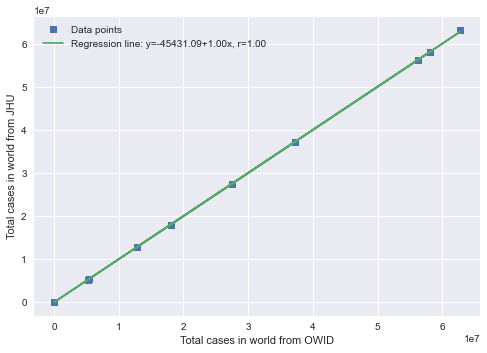

In [32]:
data = dailyKeyReturnerUsingLoc('World','total_cases')
x = []
for i in range(10):
    x.append(np.random.randint(313)-1)    
data_JHU = []
data_OWID = []
for i in x:
    data_OWID.append(data[1][i])
    data_JHU.append(totalCasesInWorldJHU[i])
    
plt.style.use('seaborn')
slope, intercept, r, p, stderr = scipy.stats.linregress(data_OWID, data_JHU )
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
print(line)
fig, ax = plt.subplots()
ax.plot(data_OWID, data_JHU, linewidth=0, marker='s', label='Data points')
temp = []
for x in data_OWID:
    temp.append(slope*x)
ax.plot(data_OWID, intercept + temp, label=line)
ax.set_xlabel('Total cases in world from OWID')
ax.set_ylabel('Total cases in world from JHU')
ax.legend(facecolor='white')
plt.show()

<h1>Introduction</h1>

Utility functions for plotting used :

In [33]:
def dayWisePlotter(x,y,figsize,xlabel,ylabel,title,MaxNLocator,xticklabels,rotation):
    plt.figure(figsize=figsize)
    ax = plt.axes(xlabel=xlabel,ylabel=ylabel,title=title)
    ax.xaxis.set_major_locator(plt.MaxNLocator(MaxNLocator))
    fig = ax.figure
    ax.figure.canvas.draw()
    ax.yaxis.set_major_formatter('{x:0.0f}')
    ax.set_xticklabels(xticklabels)                
    fig.autofmt_xdate(rotation=rotation)
    ax.plot(x,y)
    plt.show()

def monthWisePlotter(x,y,figsize,xlabel,ylabel,title):
    plt.figure(figsize=figsize)
    ax = plt.axes(xlabel=xlabel,ylabel=ylabel,title=title)
    ax.plot(x,y)
    plt.show()
    
    

<h2> Total cases worldwide </h2>

<ipython-input-33-c578551f4108>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


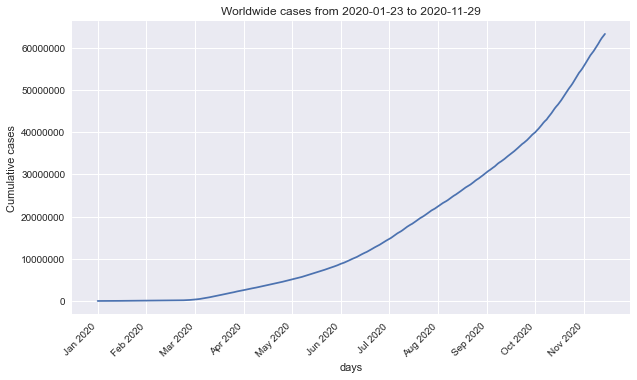

In [34]:
xticklabels=["","Jan 2020","Feb 2020","Mar 2020","Apr 2020","May 2020","Jun 2020","Jul 2020","Aug 2020","Sep 2020","Oct 2020","Nov 2020"]   
dayWisePlotter(dateTotalCasesInWorldJHU,totalCasesInWorldJHU,[10,6],"days","Cumulative cases","Worldwide cases from 2020-01-23 to 2020-11-29",12,xticklabels,45)

<h2> Total Deaths World Wide </h2>

<ipython-input-33-c578551f4108>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


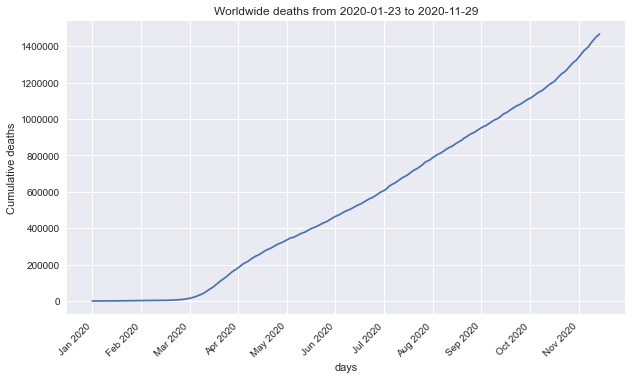

In [35]:
dayWisePlotter(dateTotalDeathsInWorldJHU,totalDeathsInWorldJHU,[10,6],"days","Cumulative deaths","Worldwide deaths from 2020-01-23 to 2020-11-29",12,xticklabels,45)

Let us look for the correlation between the cases and deaths.

Regression line: y=-4355608.73+38.93x, r=0.97


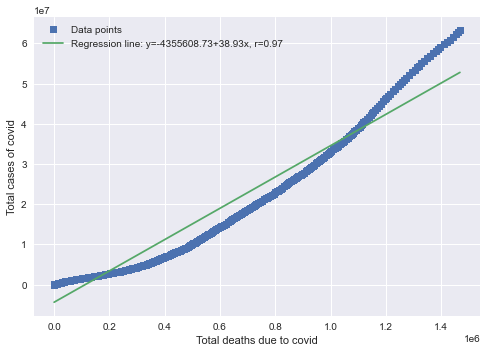

In [36]:
def correlationChecker(data_OWID,data_JHU,owid,jhu):
    slope, intercept, r, p, stderr = scipy.stats.linregress(data_OWID, data_JHU )
    line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
    print(line)
    fig, ax = plt.subplots()
    ax.plot(data_OWID, data_JHU, linewidth=0, marker='s', label='Data points')
    temp = []
    for x in data_OWID:
        temp.append(slope*x)
    ax.plot(data_OWID, intercept + temp, label=line)
    ax.set_xlabel(owid)
    ax.set_ylabel(jhu)
    ax.legend(facecolor='white')
    plt.show()



<h2> Heat Map for cases </h2>

In [90]:

circle_radius = 10
typeLists = ['stamen-watercolor']
for i in typeLists:
    fig = px.density_mapbox(df_country_cases, lat='Lat', lon='Long', radius=circle_radius, zoom=0, mapbox_style=i)
    fig.show()


<h2> Total cases and Deaths in India </h2>

<ipython-input-33-c578551f4108>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



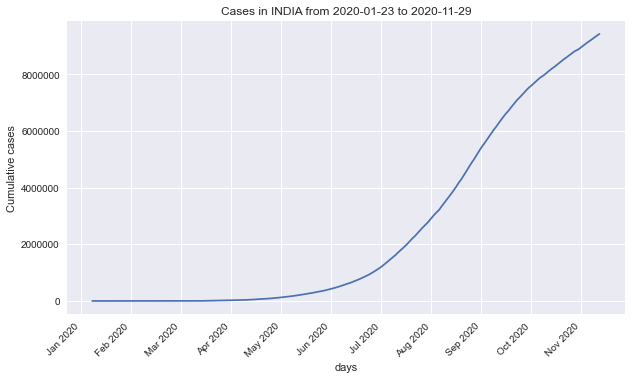

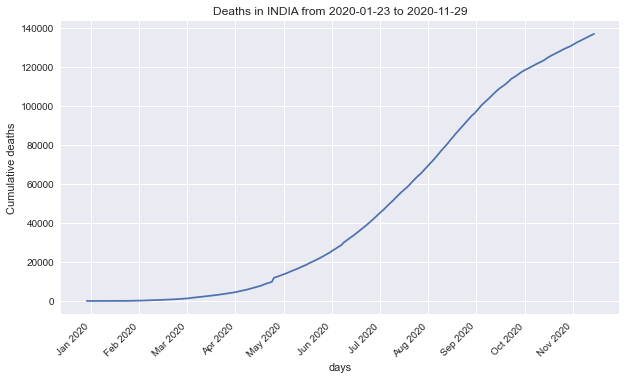

In [38]:
dataCasesIND = dailyKeyReturnerUsingLoc('India','total_cases')
dataCasesIND_month = []
for i in range(len(dataCasesIND[0])):
    test = dataCasesIND[0][i]
    test = test[len(test)-2:]
#     print(test)
    p = re.compile('01$')
    if p.match(test):
        dataCasesIND_month.append(dataCasesIND[1][i])
# print(dataCasesIND_month)
dataDeathsIND = dailyKeyReturnerUsingLoc('India','total_deaths')
dayWisePlotter(dataCasesIND[0],dataCasesIND[1],[10,6],"days","Cumulative cases","Cases in INDIA from 2020-01-23 to 2020-11-29",12,xticklabels,45)
dayWisePlotter(dataDeathsIND[0],dataDeathsIND[1],[10,6],"days","Cumulative deaths","Deaths in INDIA from 2020-01-23 to 2020-11-29",12,xticklabels,45)


Regression line: y=3487199.83+5.40x, r=0.98


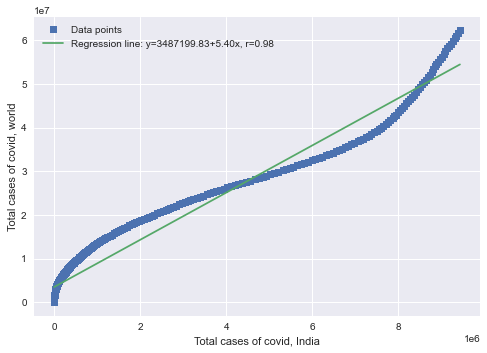

Regression line: y=247965.70+8.25x, r=0.97


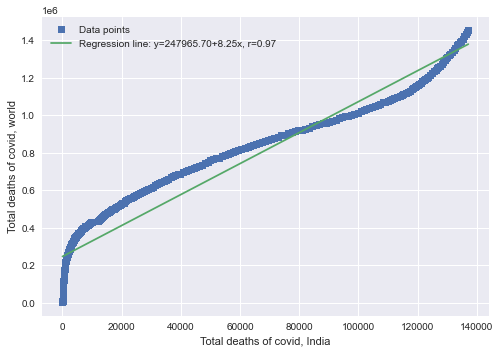

In [46]:
casesInIND = []
casesInWorld = []
for i in range(len(dataCasesIND[1])):
    if dataCasesIND[1][i]!= None and totalCasesInWorldJHU[i]!= None:
        casesInIND.append(dataCasesIND[1][i])
        casesInWorld.append(totalCasesInWorldJHU[i])
deathsInIND = []
deathsInWorld = []
for i in range(len(dataDeathsIND[1])):
    if dataDeathsIND[1][i]!= None and totalDeathsInWorldJHU[i]!= None:
        deathsInIND.append(dataDeathsIND[1][i])
        deathsInWorld.append(totalDeathsInWorldJHU[i])
    
        
        
correlationChecker(casesInIND,casesInWorld,"Total cases of covid, India","Total cases of covid, world")   
correlationChecker(deathsInIND,deathsInWorld,"Total deaths of covid, India","Total deaths of covid, world")    

<H1> Hypothesis </H1>

<h2> Cases Across Different Countries :</h2>

<ipython-input-16-744222b7a494>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



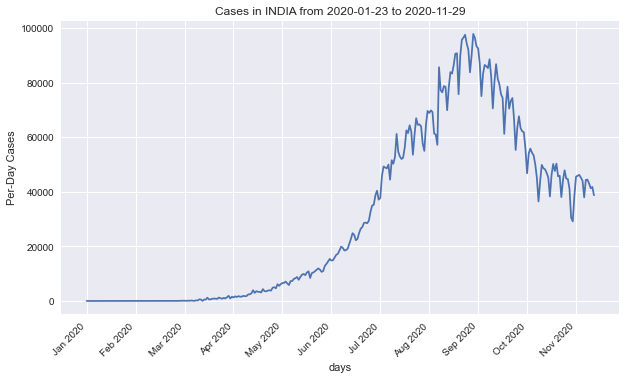

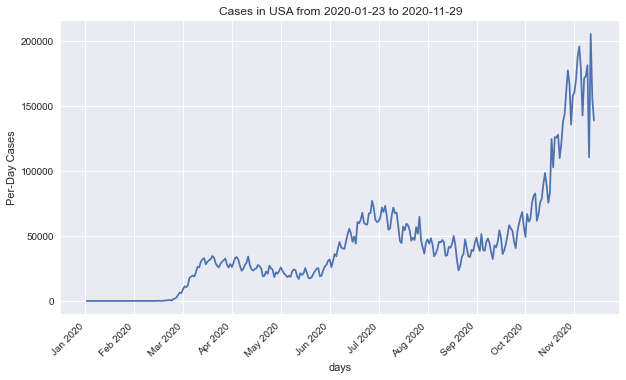

In [53]:

dataCasesDailyIND = dailyKeyReturnerUsingLoc('India','new_cases')    
dataCasesDailyUSA = dailyKeyReturnerUsingLoc('United States','new_cases')    

dayWisePlotter(dataCasesDailyIND[0],dataCasesDailyIND[1],[10,6],"days","Per-Day Cases","Cases in INDIA from 2020-01-23 to 2020-11-29",12,xticklabels,45)
dayWisePlotter(dataCasesDailyUSA[0],dataCasesDailyUSA[1],[10,6],"days","Per-Day Cases","Cases in USA from 2020-01-23 to 2020-11-29",12,xticklabels,45)




Regression line: y=23868.46+0.48x, r=0.46


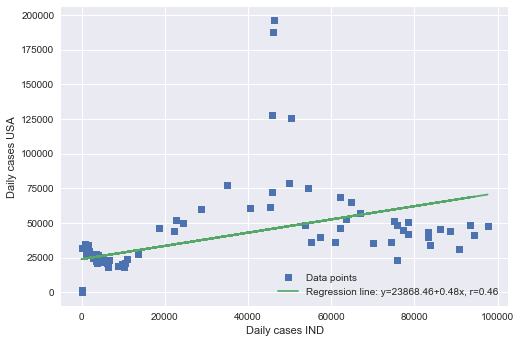

(0.4578204348377058, 1.6747486899414434e-06)

In [23]:
slope, intercept, r, p, stderr = scipy.stats.linregress(dataCasesDailyIND[1], dataCasesDailyUSA[1][1:])
sample_corr_IND = []
sample_corr_USA = []
for i in range(100):
    x = np.random.randint(len(dataCasesDailyIND[1])-1)
    sample_corr_IND.append(dataCasesDailyIND[1][x])
    sample_corr_USA.append(dataCasesDailyUSA[1][1:][x])
correlationChecker(sample_corr_IND,sample_corr_USA,"Daily cases IND","Daily cases USA")   
result = scipy.stats.pearsonr(sample_corr_IND, sample_corr_USA)
result

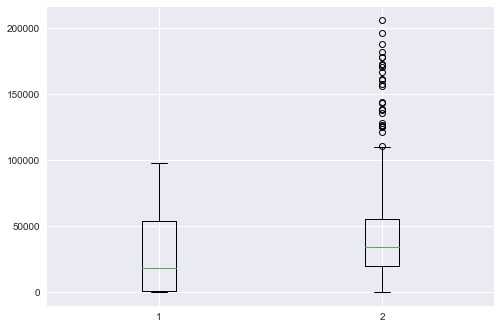

In [24]:
data=[dataCasesDailyIND[1],dataCasesDailyUSA[1][1:]]
plt.boxplot(data)
plt.show()


<h2> Age Groups </h2>

([<matplotlib.patches.Wedge at 0x1ba244713d0>,
 [Text(1.099864295735893, 0.017278048656840017, 'Less than 14 years'),
  Text(1.0933570509441903, 0.12070774271198717, '15-29 years'),
  Text(0.9397051872092018, 0.5717990566030334, '30-44 years'),
  Text(-0.4652279531565006, 0.9967762796143441, '45-59 years'),
  Text(-0.36610163557183434, -1.0372895412716876, '60-74 years'),
  Text(1.042912059127538, -0.34976340135348516, 'More than 75 years')])

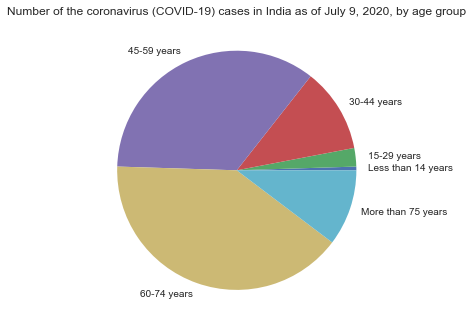

In [25]:

ageGroup = []
percentage = []

colAge = ws_age_data['B']
colPer = ws_age_data['C']

for x in range(5,11):
    ageGroup.append(colAge[x].value)
    percentage.append(colPer[x].value)
plt.title("Number of the coronavirus (COVID-19) cases in India as of July 9, 2020, by age group")
plt.pie(percentage, labels = ageGroup) 
    



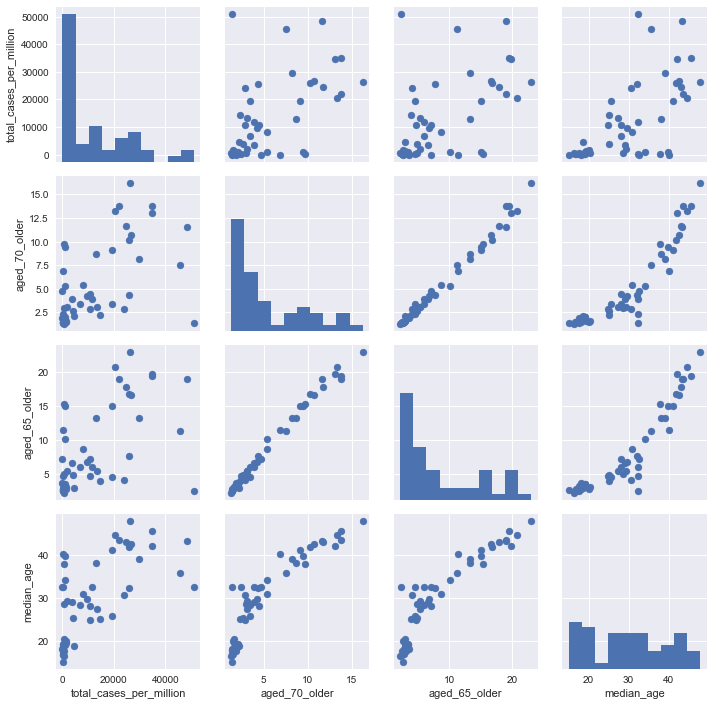

In [78]:

g=sb.PairGrid(data=df_ageGroupData.sample(n=50), vars=ageGroupList)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

<h2> Diseases : </h2>

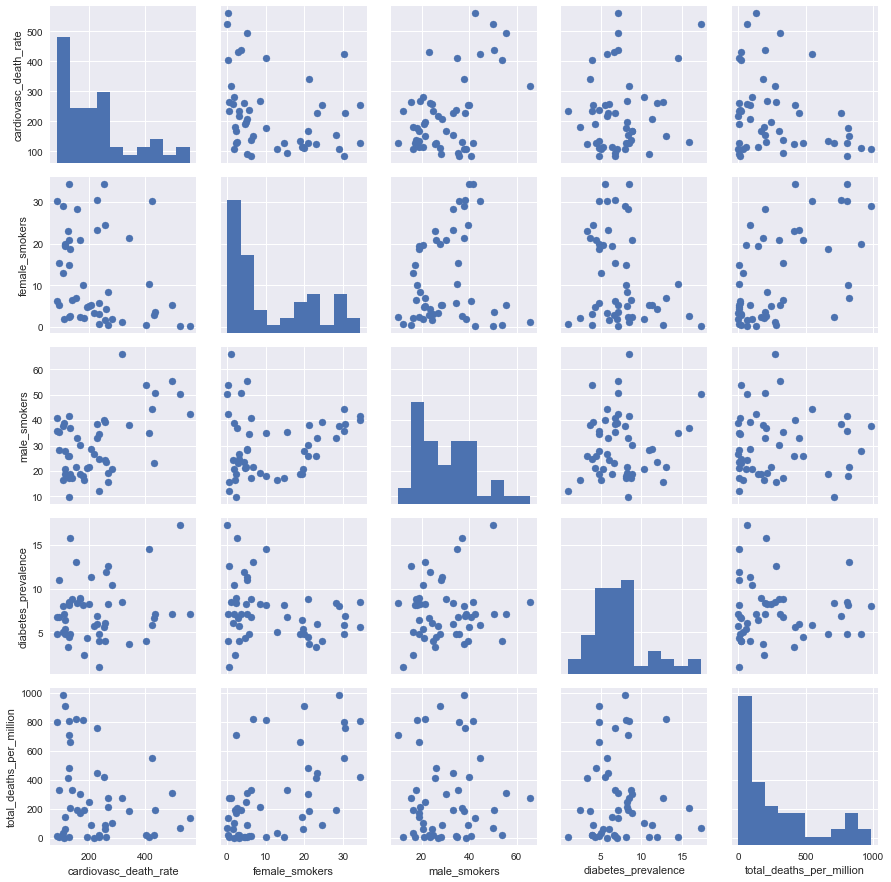

In [84]:
g=sb.PairGrid(data=df_disease.sample(n=50), vars=disease_list)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);


<h2> Altitude </h2>

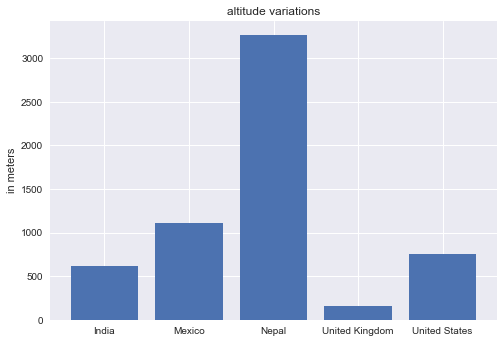

NameError: name 'dataS5' is not defined

In [63]:
column = ws_altitude['A']  # Column
columnalt = ws_altitude['D']
countriesToLookFor = ['India','Mexico','Nepal','United Kingdom','United States']
data=[]
countries=[]
for i in range(len(column)):
    countries.append(column[i].value)


for i in countriesToLookFor:
    x=columnalt[countries.index(i)].value
    s=''
    for i in x:
        if i.isdigit():
            s=s+i
        elif i==',':
            continue
        else:
            break
    data.append(int(s))

plt.bar(countriesToLookFor,data)
plt.title('altitude variations')
plt.ylabel('in meters')
plt.show()


countriesToLookFor = ['IND','MEX','NPL','UKR','USA']
totalCases = []
for C in countriesToLookFor:    
    totalCases.append(dailyCasesPlotter(C,'new_cases_per_million'))
countriesToLookFor[3] = 'UK'
totalCases[3] = 1640000*1000000/66000000
plt.bar(countriesToLookFor,totalCases)
plt.title("Total cases of covid")

<h2> Economy </h2>

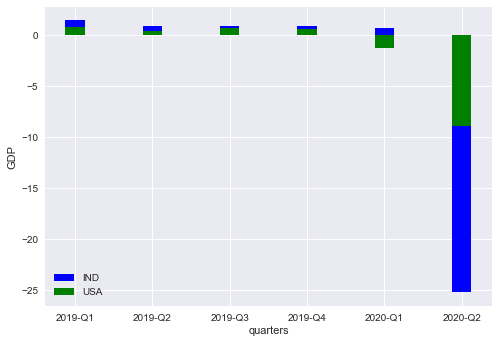

In [29]:
column = ws_economy['A']
countries=['USA','IND']
time=['2019-Q1','2019-Q2','2019-Q3','2019-Q4','2020-Q1','2020-Q2']
values=ws_economy['G']

gdpind=[]
gdpusa=[]
for j in range(1,len(column)):
    if column[j].value=='USA':
        gdpusa.append(values[j].value)
    if column[j].value=='IND':
        gdpind.append(values[j].value)


gdpusa.pop()
data=[gdpind,gdpusa]
fig, ax = plt.subplots() 
ax.bar(time, data[0], color = 'b', width = 0.25)
ax.bar(time, data[1], color = 'g', width = 0.25)
ax.legend(['IND','USA'],loc="lower left")
plt.xlabel('quarters')
plt.ylabel('GDP')
plt.show()


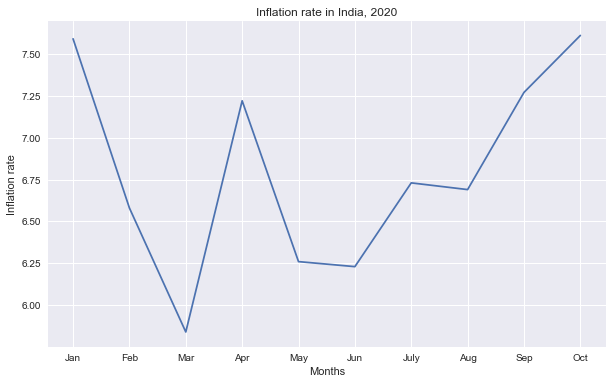

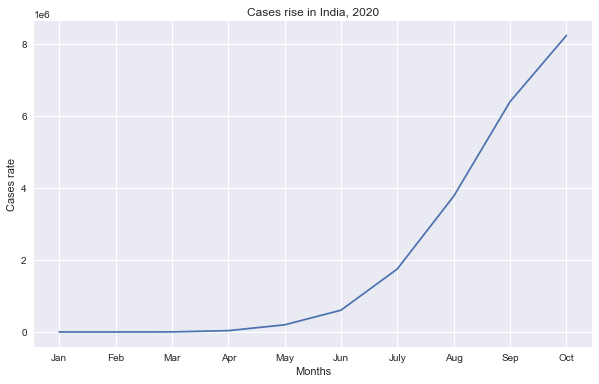

In [56]:
#inflation rate
data = economyGetter("INFLATION RATE")

month = ["Jan","Feb","Mar","Apr","May","Jun","July","Aug","Sep","Oct"]
monthWisePlotter(month,data,[10,6],"Months","Inflation rate","Inflation rate in India, 2020")
monthWisePlotter(month,dataCasesIND_month,[10,6],"Months","Cases rate","Cases rise in India, 2020")


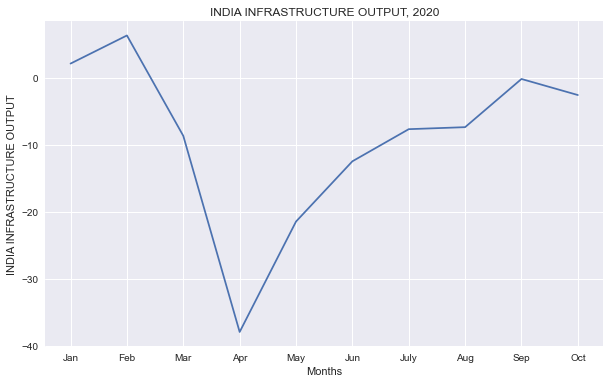

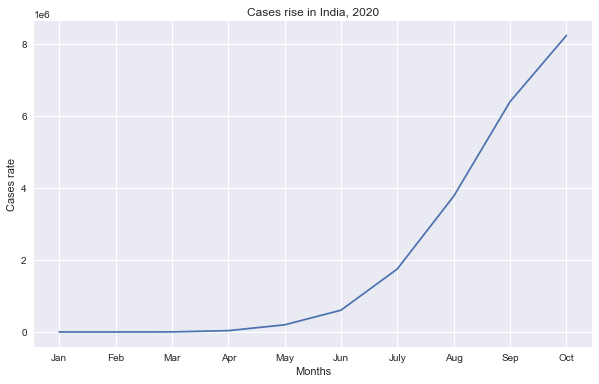

In [57]:
data = economyGetter("INDIA INFRASTRUCTURE OUTPUT")
monthWisePlotter(month,data,[10,6],"Months","INDIA INFRASTRUCTURE OUTPUT","INDIA INFRASTRUCTURE OUTPUT, 2020")
monthWisePlotter(month,dataCasesIND_month,[10,6],"Months","Cases rate","Cases rise in India, 2020")


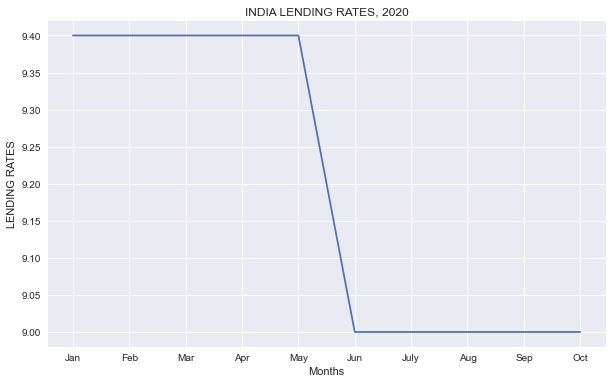

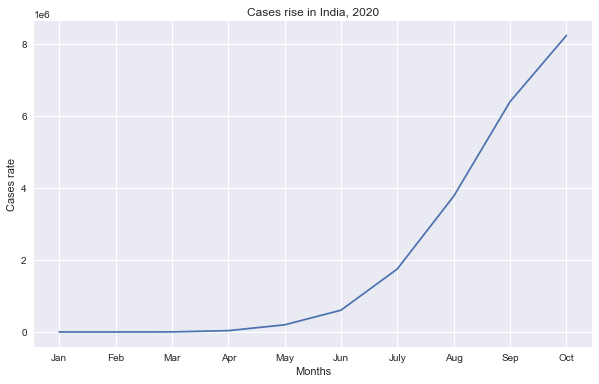

In [58]:
data = economyGetter("LENDING RATES")
monthWisePlotter(month,data,[10,6],"Months","LENDING RATES","INDIA LENDING RATES, 2020")
monthWisePlotter(month,dataCasesIND_month,[10,6],"Months","Cases rate","Cases rise in India, 2020")


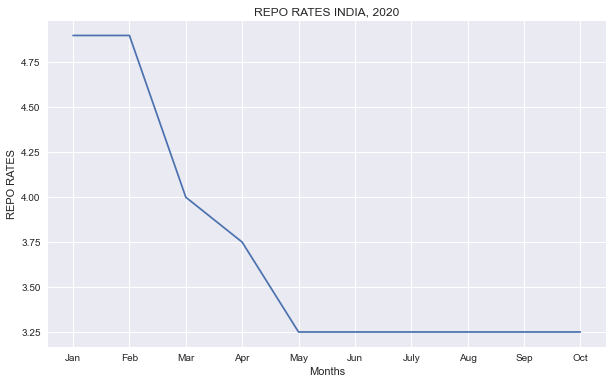

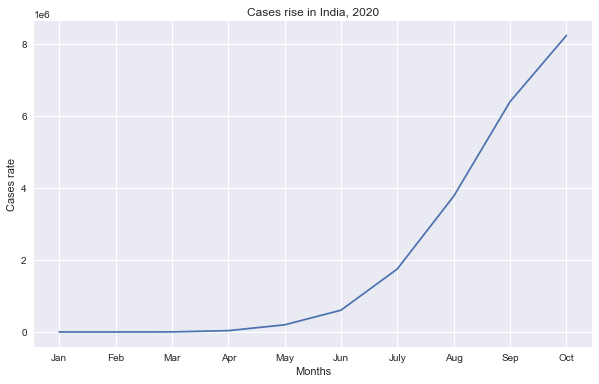

In [59]:
data = economyGetter("REPO RATES")
monthWisePlotter(month,data,[10,6],"Months","REPO RATES","REPO RATES INDIA, 2020")
monthWisePlotter(month,dataCasesIND_month,[10,6],"Months","Cases rate","Cases rise in India, 2020")


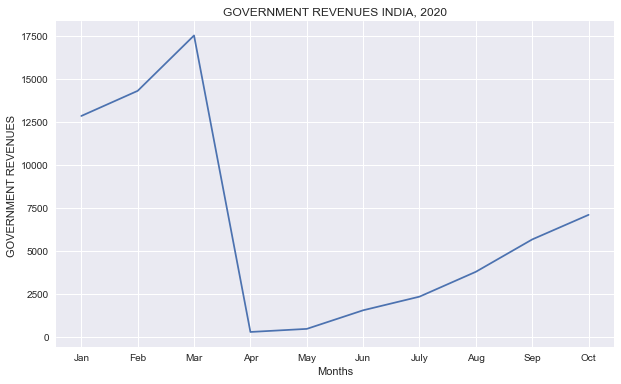

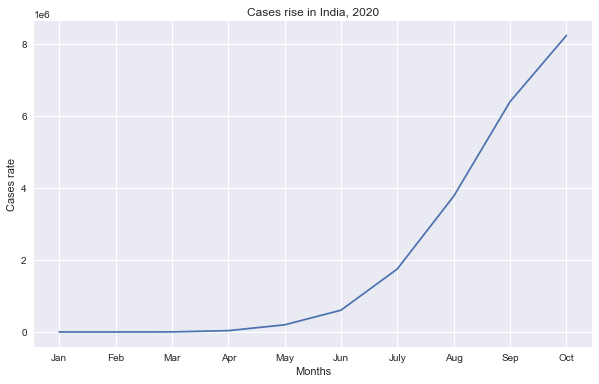

In [60]:
data = economyGetter("GOVERNMENT REVENUES ")
monthWisePlotter(month,data,[10,6],"Months","GOVERNMENT REVENUES ","GOVERNMENT REVENUES INDIA, 2020")
monthWisePlotter(month,dataCasesIND_month,[10,6],"Months","Cases rate","Cases rise in India, 2020")


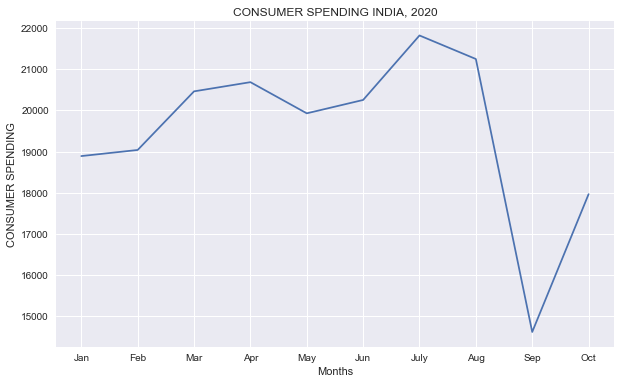

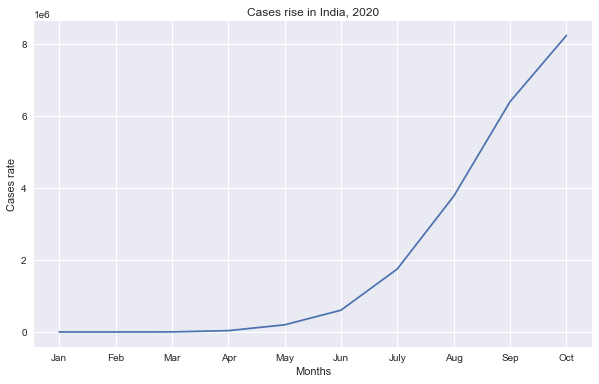

In [61]:
data = economyGetter("CONSUMER SPENDING")
monthWisePlotter(month,data,[10,6],"Months","CONSUMER SPENDING","CONSUMER SPENDING INDIA, 2020")
monthWisePlotter(month,dataCasesIND_month,[10,6],"Months","Cases rate","Cases rise in India, 2020")


<h2> After Lockdown Effects </h2>

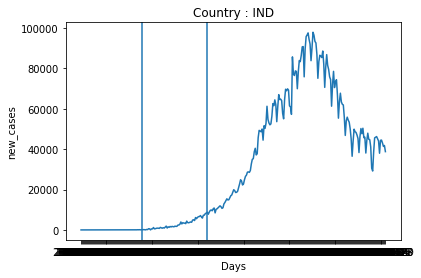

In [94]:

def dailyCasesPlotter(code,key,startDate,endDate):
    iso_codes = dataS5['iso_code']
#     print(iso_codes)
    date = dataS5['date']
    total_cases = dataS5[key]
    total_cases_IND = []
    date_IND = []
    for x in range(len(iso_codes)):
        if iso_codes[x] == code:
            total_cases_IND.append(total_cases[x])
            date_IND.append(date[x])
    pyplot.plot(date_IND,total_cases_IND)
    pyplot.title("Country : " + code)
    pyplot.xlabel("Days")
    pyplot.axvline(x=startDate)
    pyplot.axvline(x=endDate)
    pyplot.ylabel(key)
    pyplot.show()

dailyCasesPlotter('IND','new_cases','2020-03-25','2020-05-31')

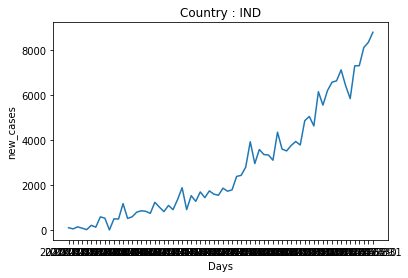

In [113]:

def dailyCasesLPlotter(code,key,startDate,endDate):
    iso_codes = dataS5['iso_code']
#     print(iso_codes)
    date = dataS5['date']
    total_cases = dataS5[key]
    total_cases_IND = []
    date_IND = []
    for x in range(len(iso_codes)):
        if iso_codes[x] == code:
            total_cases_IND.append(total_cases[x])
            date_IND.append(date[x])
    startKey = date.index(startDate)
    endKey = date.index(endDate)
    final_cases = []
    final_date = []
    for x in range(startKey,endKey+1):
        final_cases.append(total_cases_IND[x])
        final_date.append(date_IND[x])
    pyplot.plot(final_date,final_cases)
    pyplot.title("Country : " + code)
    pyplot.xlabel("Days")
    pyplot.ylabel(key)
    pyplot.show()
    
dailyCasesLPlotter('IND','new_cases','2020-03-25','2020-05-31')    

([<matplotlib.patches.Wedge at 0x26b03cd7640>,
 [Text(-0.46835717599151955, 0.995309778760989, 'Bought at a higher price than mandated by the government at a retail store/chemist'),
  Text(0.13786642613375089, -1.0913261879681562, 'Bought at government mandated price at a retail store/chemist'),
  Text(1.0461621185951564, -0.33991884563303376, 'Bought at a higher price than mandated by the government online')])

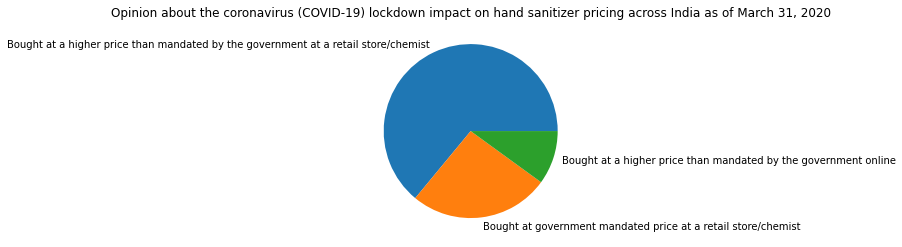

In [96]:
wbAge = load_workbook("D:\statistic_id1108922_opinion-on-impact-of-covid-19-lockdown-on-hand-sanitizer-prices-india-2020.xlsx")  # Work Book
wsAge = wbAge[wbAge.sheetnames[1]]

ageGroup = []
percentage = []

colAge = wsAge['B']
colPer = wsAge['C']

for x in range(5,8):
    ageGroup.append(colAge[x].value)
    percentage.append(colPer[x].value)
pyplot.title("Opinion about the coronavirus (COVID-19) lockdown impact on hand sanitizer pricing across India as of March 31, 2020")
pyplot.pie(percentage, labels = ageGroup) 
    



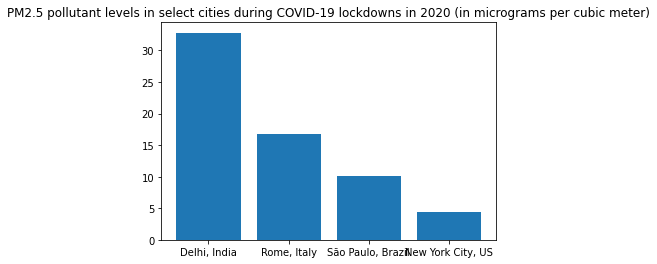

Text(0.5, 1.0, 'Total cases of covid')

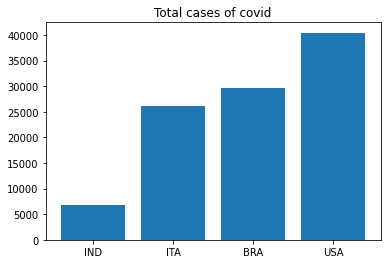

In [112]:
wbAge = load_workbook("D:\statistic_id1119805_pm25-pollutant-levels-in-select-worldwide-cities-during-covid-19-lockdown-2020.xlsx")  # Work Book
wsAge = wbAge[wbAge.sheetnames[1]]

ageGroup = []
percentage = []

colAge = wsAge['B']
colPer = wsAge['C']

for x in range(6,10):
    ageGroup.append(colAge[x].value)
    percentage.append(colPer[x].value)
#     percentage.append(0)
pyplot.title("PM2.5 pollutant levels in select cities during COVID-19 lockdowns in 2020 (in micrograms per cubic meter)")
pyplot.bar(ageGroup,percentage)
pyplot.show()
countriesToLookFor = ['IND','ITA','BRA','USA']
totalCases = []
for C in countriesToLookFor:    
    totalCases.append(dailyCasesPlotter(C,'new_cases_per_million'))

pyplot.bar(countriesToLookFor,totalCases)
pyplot.title("Total cases of covid")    



In [101]:
columnHeadings = dataS5.keys()
print(columnHeadings)

dict_keys(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_faci

In [96]:
df_interpretation_data = df_cases_today.dropna(subset=['aged_70_older', 'female_smokers', 'total_deaths_per_million'])
df_interpretation_data[['aged_70_older', 'female_smokers', 'total_deaths_per_million']].describe()


,aged_70_older,female_smokers,total_deaths_per_million
count,133.000000,133.000000,133.000000
mean,6.314150,10.324316,247.088722
std,4.481236,10.282214,297.358834
min,0.526000,0.100000,0.352000
25%,2.380000,1.900000,18.502000
50%,5.030000,5.900000,105.982000
75%,9.842000,19.100000,362.122000
max,18.493000,44.000000,1427.744000


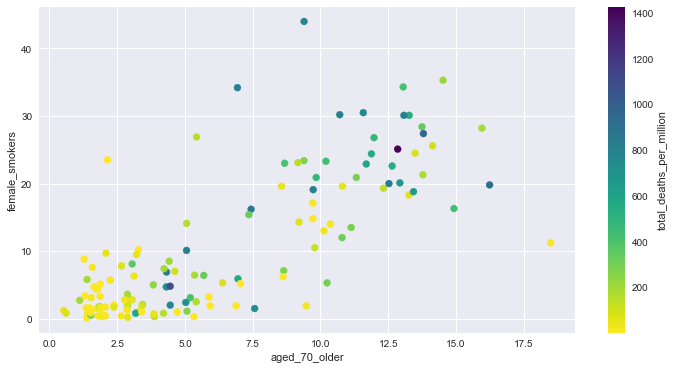

In [98]:
plt.figure(figsize=[12,6])
plt.scatter(data=df_interpretation_data, x='aged_70_older', y='female_smokers', c='total_deaths_per_million', cmap='viridis_r' );
plt.colorbar(label='total_deaths_per_million');
plt.xlabel('aged_70_older');
plt.ylabel('female_smokers');
axes = plt.gca()